In [43]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

In [29]:
#global variables
figsize_x = 17
figsize_y = 5

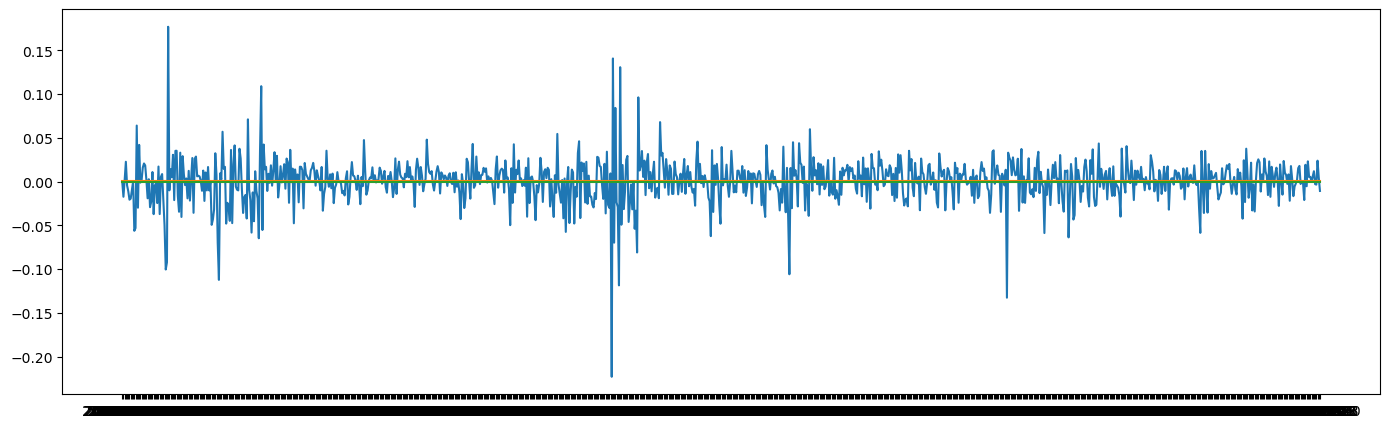

In [60]:
#importing data
df_SMI = pd.read_csv("Data (learning)/SMI_weekly_(Switzerland).csv")
df_SMI['Weekly Returns'] = df_SMI['Close'].pct_change()
df_SMI['Weekly Returns'].fillna(0, inplace=True)

#calculating weekly returns
df_SMI_np_returns = df_SMI.to_numpy()[:,-1]
df_SMI_np_date = df_SMI.to_numpy()[:,0]

#mean
mean_SMI_returns = np.mean(df_SMI_np_returns)*np.ones(len(df_SMI_np_returns))


#plot of returns for SMI weekly returns
plt.figure(figsize=(figsize_x,figsize_y))
plt.plot(df_SMI_np_date, df_SMI_np_returns)
plt.plot(df_SMI_np_date, mean_SMI_returns)
plt.plot(df_SMI_np_date, np.zeros(len(df_SMI_np_returns)))
plt.show()

In [63]:
print(np.mean(df_SMI_np_returns))
print(np.var(df_SMI_np_returns))

0.0006106318601781296
0.000637686951937372


/Users/goshabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


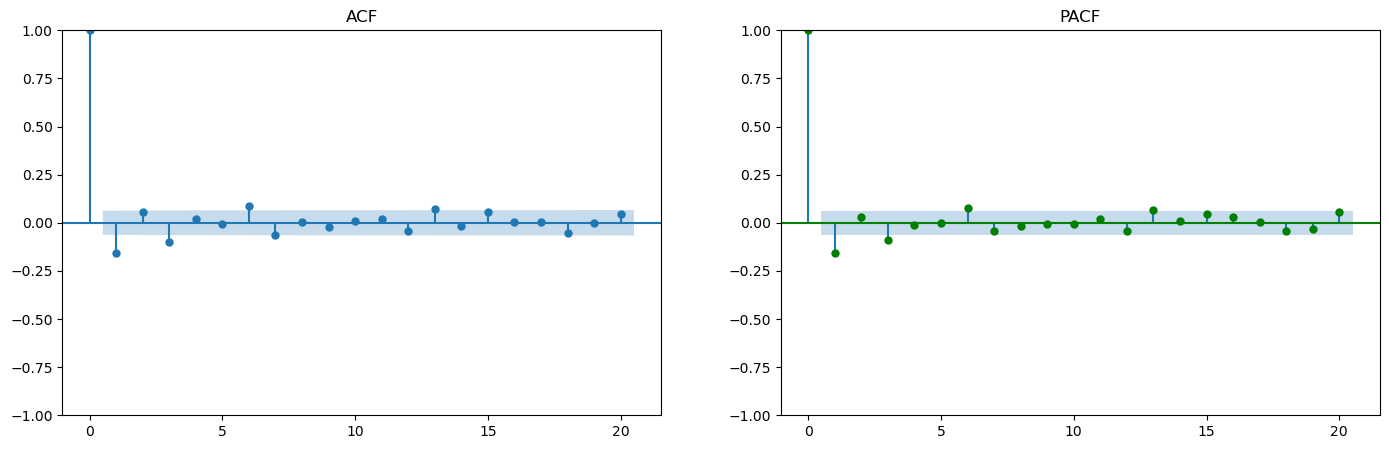

In [40]:
#ACF and PACF
lags = 20
fig, ax = plt.subplots(nrows=1, ncols=2 ,figsize=(figsize_x, figsize_y))
tsaplots.plot_acf(df_SMI_np_returns, lags=lags, title='ACF', ax=ax[0])
tsaplots.plot_pacf(df_SMI_np_returns, lags=lags, color='g', title='PACF', ax=ax[1])
plt.show()

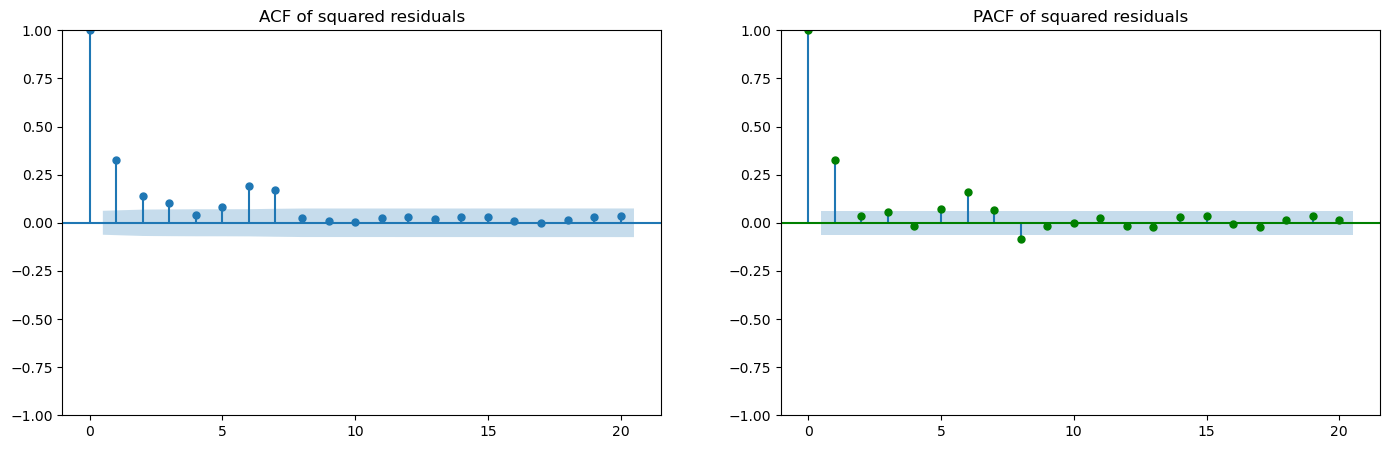

In [42]:
#squared residuals' ACF and PACF
fig, ax = plt.subplots(nrows=1, ncols=2 ,figsize=(figsize_x, figsize_y))
tsaplots.plot_acf(df_SMI_np_returns**2, lags=lags, title='ACF of squared residuals', ax=ax[0])
tsaplots.plot_pacf(df_SMI_np_returns**2, lags=lags, color='g', title='PACF of squared residuals', ax=ax[1])
plt.show()

In [74]:
#Normality test: Jarque-Bera test
JB = sp.stats.jarque_bera(df_SMI_np_returns)

print('Jarque-Bera test: ', JB)

#Stationarity tests: Augmented Dickey-Fuller and KPSS tests
ADF = sm.tsa.stattools.adfuller(df_SMI_np_returns, regression='ct')
KPSS = sm.tsa.stattools.kpss(df_SMI_np_returns, regression='ct', nlags='legacy')

print("ADF: ", ADF)
print("KPSS: ", KPSS)

Jarque-Bera test:  Jarque_beraResult(statistic=5988.153063095361, pvalue=0.0)
ADF:  (-20.347266037704312, 0.0, 2, 989, {'1%': -3.967952994278947, '5%': -3.4149385165727604, '10%': -3.1296683938683643}, -4406.53570022227)
KPSS:  (0.06237808943190155, 0.1, 22, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})


/Users/goshabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


5.31282425883833
51.72562289128103


(array([3., 0., 2., 1., 2., 1., 0., 0., 0., 1.]),
 array([-0.020542694408759443, -0.016211766412847828,
        -0.011880838416936212, -0.007549910421024597,
        -0.0032189824251129817, 0.0011119455707986337,
        0.005442873566710249, 0.009773801562621864, 0.01410472955853348,
        0.018435657554445095, 0.02276658555035671], dtype=object),
 <BarContainer object of 10 artists>)

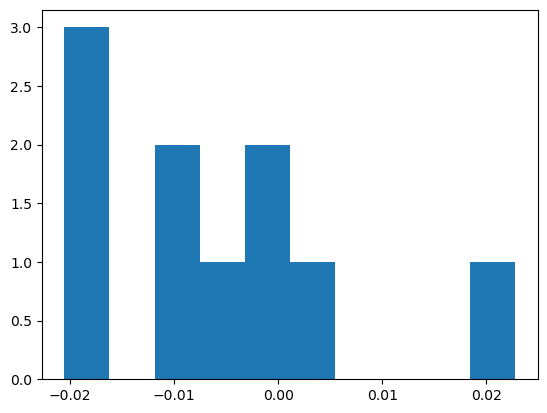

In [65]:
def kurtosis(x):
    mean = np.mean(x)
    n = len(x)
    numerator = np.sum(((x-mean)**4))
    denominator = n*np.var(x)**2
    return numerator/(denominator)

def skewness(x):
    mean = np.mean(x)
    n = len(x)
    numerator = np.sum((x-mean)**3)/n
    denominator = (np.var(x)/n)**(3/2)
    return numerator/denominator

print(kurtosis(df_SMI_np_returns[100:110]))
print(skewness(df_SMI_np_returns[100:110]))
plt.hist(df_SMI_np_returns[:10])